In [33]:
from parcels import Field, FieldSet, ParticleSet, JITParticle, plotTrajectoriesFile, AdvectionRK4,ErrorCode
import numpy as np
import os
from datetime import timedelta
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cmocean as cmo
import xarray as xr
import netCDF4
import pandas as pd
import seaborn as sns
import geopy.distance
%pylab inline

proj=ccrs.Mercator()
pc = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 12),dpi=360)



Populating the interactive namespace from numpy and matplotlib


<Figure size 7200x4320 with 0 Axes>

# Plotting of Mean 

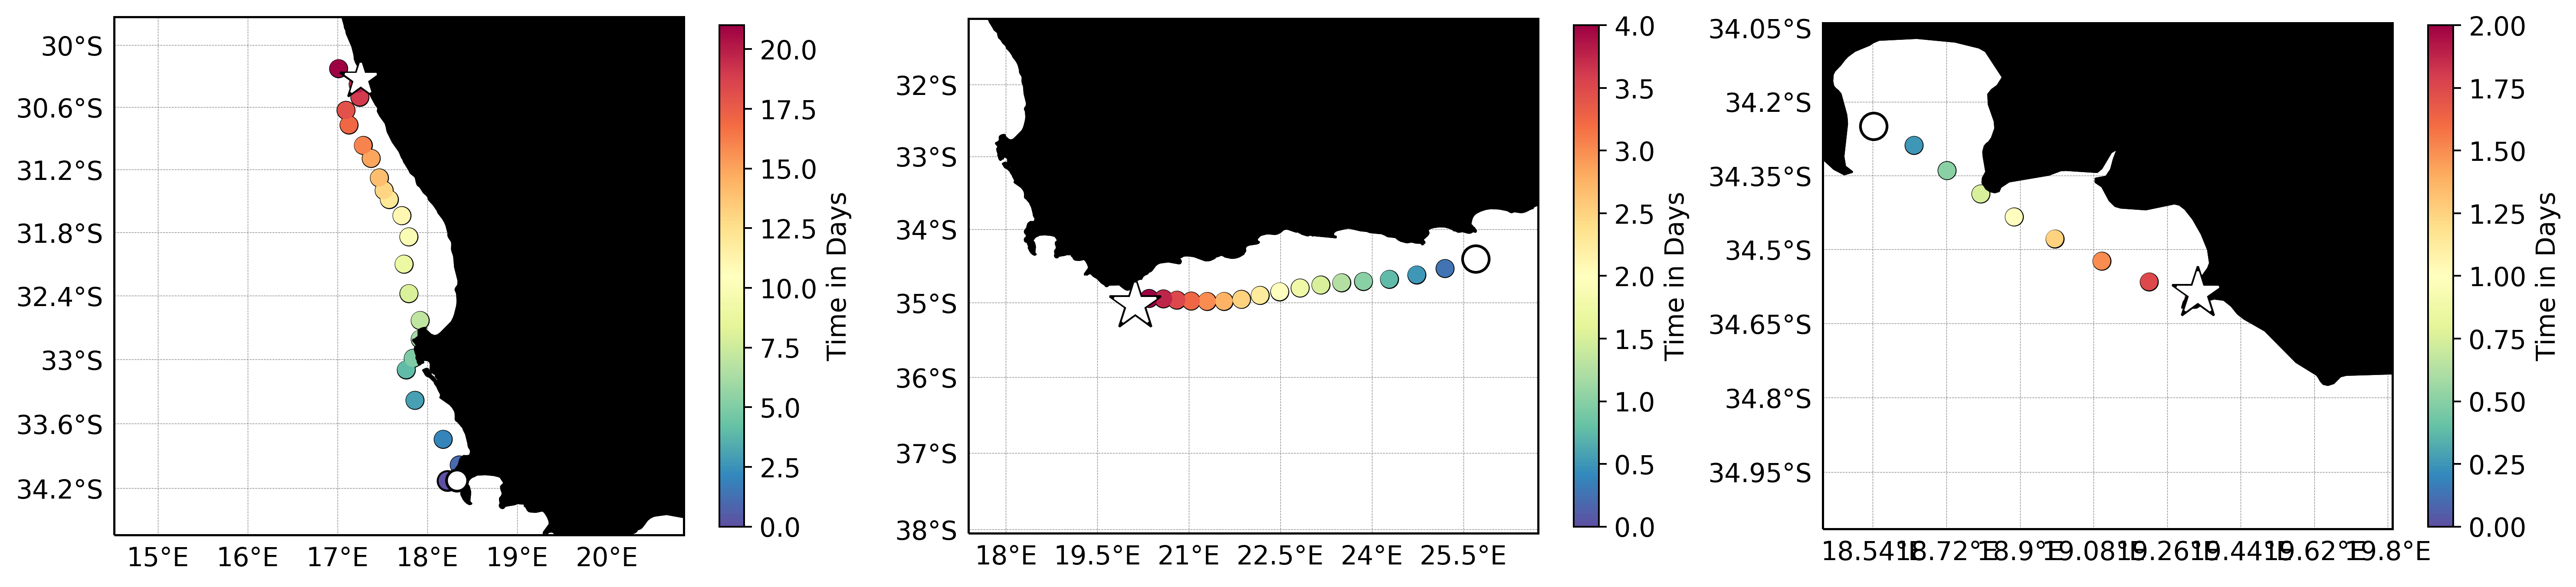

In [34]:

pcc = netCDF4.Dataset("/Volumes/MIKES_DISK/Surfboard_Experiment/surf_board.nc") 
x2  = pcc.variables["lon"][:,-1]
y2  = pcc.variables["lat"][:,-1]
lon = pcc.variables["lon"][:,:]
lat = pcc.variables["lat"][:,:]
traj =pcc.variables["trajectory"][0]
t   = pcc.variables['time'][:,:]

timaa = t[:,:]/86400
xd = np.array(x2)
yd = np.array(y2)


plt.rcParams.update({'font.size': 12})

res = '10m'
fig = plt.figure(figsize=(20, 12),dpi=360)


land = cfeature.NaturalEarthFeature('physical', 'land', res,
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
states = cfeature.NaturalEarthFeature('cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale=res, facecolor='none')
proj=ccrs.Mercator()
ax = plt.subplot(231, projection=proj)
pc = ccrs.PlateCarree()
extent=[np.min(np.nanmean(lon,axis=0))-2.5, 
        np.max(np.nanmean(lon,axis=0))+2.5,
        np.min(np.nanmean(lat,axis=0))-0.5,
        np.max(np.nanmean(lat,axis=0))+0.5]
ax.set_extent(extent, pc)
ax.add_feature(land, facecolor='black',zorder=15)
ax.coastlines(resolution=res)  # coastline re
cmap = cmo.cm.balance
cmap.set_under(color='white')

ax.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=18)
ax.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=12)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.25, 
                  color='gray', alpha=1, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False

cb = ax.scatter(np.nanmean(lon,axis=0).T,np.nanmean(lat,axis=0).T,c=np.nanmean(timaa,axis=0),s=50,
        marker="o", zorder=15,transform=pc,alpha=1,cmap=plt.cm.Spectral_r)
ax.scatter(np.nanmean(lon,axis=0).T,np.nanmean(lat,axis=0).T,c='black',s=60,
        marker="o", zorder=14,transform=pc,alpha=1)

ax.plot(17.2582986,-30.3251343, marker = "*", zorder=120,transform=pc,color='k',alpha=1,ms=20)
ax.plot(17.2582986,-30.3251343, marker = "*", zorder=120,transform=pc,color='w',alpha=1,ms=15)
ax.plot(18.3281983,-34.1273175, marker = ".", zorder=120,transform=pc,color='k',alpha=1,ms=20)
ax.plot(18.3281983,-34.1273175, marker = ".", zorder=120,transform=pc,color='w',alpha=1,ms=15)

cbar = plt.colorbar(cb,shrink=0.78)
cbar.set_label("Time in Days")


pcc = netCDF4.Dataset("caps_all_2000.nc") 
x2  = pcc.variables["lon"][:,:-20]
y2  = pcc.variables["lat"][:,:-20]
lon = pcc.variables["lon"][:,:-20]
lat = pcc.variables["lat"][:,:-20]
t   = pcc.variables['time'][:,:-20]

timaa = (t[:,:]-t[0,0])/(86400)
xd = np.array(x2)
yd = np.array(y2)


land = cfeature.NaturalEarthFeature('physical', 'land', res,
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
states = cfeature.NaturalEarthFeature('cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale=res, facecolor='none')
proj=ccrs.Mercator()
ax1 = plt.subplot(232, projection=proj)
pc = ccrs.PlateCarree()
extent=[np.nanmin(lon)-1, 
        np.nanmax(lon)+1,
        np.nanmin(lat)-1,
        np.nanmax(lat)+3]
ax1.set_extent(extent, pc)
ax1.add_feature(land, facecolor='black',zorder=15)
ax1.coastlines(resolution=res)  # coastline re
cmap = cmo.cm.balance
cmap.set_under(color='white')

ax1.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=18)
ax1.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=12)

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.25, 
                  color='gray', alpha=1, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False

cb = ax1.scatter(np.nanmean(lon,axis=0).T[::6],np.nanmean(lat,axis=0).T[::6],c=np.nanmean(timaa,axis=0)[::6]
                 ,s=50,
        marker="o", zorder=15,transform=pc,alpha=1,cmap=plt.cm.Spectral_r)
ax1.scatter(np.nanmean(lon,axis=0).T[::6],np.nanmean(lat,axis=0).T[::6],c='black',s=60,
        marker="o", zorder=14,transform=pc,alpha=1)

ax1.plot(lon[0,0],lat[0,0], marker = ".", zorder=120,transform=pc,color='k',alpha=1,ms=25)
ax1.plot(lon[0,0],lat[0,0], marker = ".", zorder=120,transform=pc,color='w',alpha=1,ms=20)
ax1.plot(20.1220966667,-35.02199, marker = "*", zorder=120,transform=pc,color='k',alpha=1,ms=25)
ax1.plot(20.1220966667,-35.02199, marker = "*", zorder=120,transform=pc,color='w',alpha=1,ms=20)

cbar = plt.colorbar(cb,shrink=0.78)
cbar.set_label("Time in Days")

pcc = netCDF4.Dataset("nsri_test1.nc") 
x2  = pcc.variables["lon"][:,:]
y2  = pcc.variables["lat"][:,:]
lon = pcc.variables["lon"][:,:]
lat = pcc.variables["lat"][:,:]
t   = pcc.variables['time'][:,:]

timaa = (t[:,:]-t[0,0])/(86400)
xd = np.array(x2)
yd = np.array(y2)


land = cfeature.NaturalEarthFeature('physical', 'land', res,
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])
states = cfeature.NaturalEarthFeature('cultural',
                                          name='admin_1_states_provinces_lines',
                                          scale=res, facecolor='none')
proj=ccrs.Mercator()
ax2 = plt.subplot(233, projection=proj)
pc = ccrs.PlateCarree()
extent=[np.nanmin(lon)-0.1, 
        np.nanmax(lon)+0.1,
        np.nanmin(lat)-0.1,
        np.nanmax(lat)+0.1]
ax2.set_extent(extent, pc)
ax2.add_feature(land, facecolor='black',zorder=15)
ax2.coastlines(resolution=res)  # coastline re
cmap = cmo.cm.balance
cmap.set_under(color='white')

ax2.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='k',alpha=1,ms=18)
ax2.plot(lon[0,0],lat[0,0], marker = ".", zorder=12,transform=pc,color='w',alpha=1,ms=12)

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.25, 
                  color='gray', alpha=1, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = False
gl.ylabels_right = False


cb = ax2.scatter(np.nanmean(lon,axis=0).T[::6],np.nanmean(lat,axis=0).T[::6],c=np.nanmean(timaa,axis=0)[::6]
                 ,s=50,
        marker="o", zorder=15,transform=pc,alpha=1,cmap=plt.cm.Spectral_r)
ax2.scatter(np.nanmean(lon,axis=0).T[::6],np.nanmean(lat,axis=0).T[::6],c='black',s=60,
        marker="o", zorder=14,transform=pc,alpha=1)

ax2.plot(lon[0,0],lat[0,0], marker = ".", zorder=120,transform=pc,color='k',alpha=1,ms=25)
ax2.plot(lon[0,0],lat[0,0], marker = ".", zorder=120,transform=pc,color='w',alpha=1,ms=20)
ax2.plot(19.3347523,-34.588649, marker = "*", zorder=120,transform=pc,color='k',alpha=1,ms=25)
ax2.plot(19.3347523,-34.588649, marker = "*", zorder=120,transform=pc,color='w',alpha=1,ms=20)

cbar = plt.colorbar(cb,shrink=0.78)
cbar.set_label("Time in Days")

plt.show()

# Beginning of Stats

In [141]:
# surfboard
sc = xr.open_dataset("/Volumes/MIKES_DISK/Surfboard_Experiment/surf_board.nc") 

lon = sc.lon
lat = sc.lat

dlon = np.mean(lon[:,-1],axis=0)
dlat = np.mean(lat[:,-1],axis=0)
flon = 17.2582986
flat = -30.3251343

dd = (dlon, dlat)
d  = (flon, flat)
surf = geopy.distance.vincenty((dd), (d)).km

### catamarn

cc = xr.open_dataset("caps_all_2000.nc") 

clon = cc.lon
clat = cc.lat

cdlon = np.mean(clon[:,-20],axis=0)
cdlat = np.mean(clat[:,-20],axis=0)
cflon = 20.1220966667
cflat = -35.02199

cdd = (cdlon, cdlat)
cd  = (cflon, cflat)
caps = geopy.distance.vincenty((cdd), (cd)).km

### boat
bc = xr.open_dataset("nsri_test1.nc") 

blon = bc.lon
blat = bc.lat
boat = []
bdlon = np.mean(blon[:,-1],axis=0)
bdlat = np.mean(blat[:,-1],axis=0)
bflon = 19.3347523
bflat = -34.588649

bdd = (bdlon, bdlat)
bd  = (bflon, bflat)
boat= geopy.distance.vincenty((bdd), (bd)).km



/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  
/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:45: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


## Distance Between Final Position 

In [142]:
data = [['Surfboard', surf], ['Catamaran', caps], ['Boat', boat]] 
df = pd.DataFrame(data, columns = ['Object', 'Mean Distance From Object in km']) 

df

,Object,Mean Distance From Object in km
0,Surfboard,29.419861
1,Catamaran,8.872998
2,Boat,1.657742


## Lagrangian Separation

In [143]:
sMx = 1/len(sc.lon[:,0])*(surf)
cMx = 1/len(cc.lon[:,0])*(caps)
bMx = 1/len(bc.lon[:,0])*(boat)

In [144]:
data = [['Surfboard', sMx], ['Catamaran', cMx], ['Boat', bMx]] 
df = pd.DataFrame(data, columns = ['Object', 'Mean Lagrangian Separation']) 

df

,Object,Mean Lagrangian Separation
0,Surfboard,0.294199
1,Catamaran,0.009233
2,Boat,0.007368


Text(0.5, 0, 'time in days')

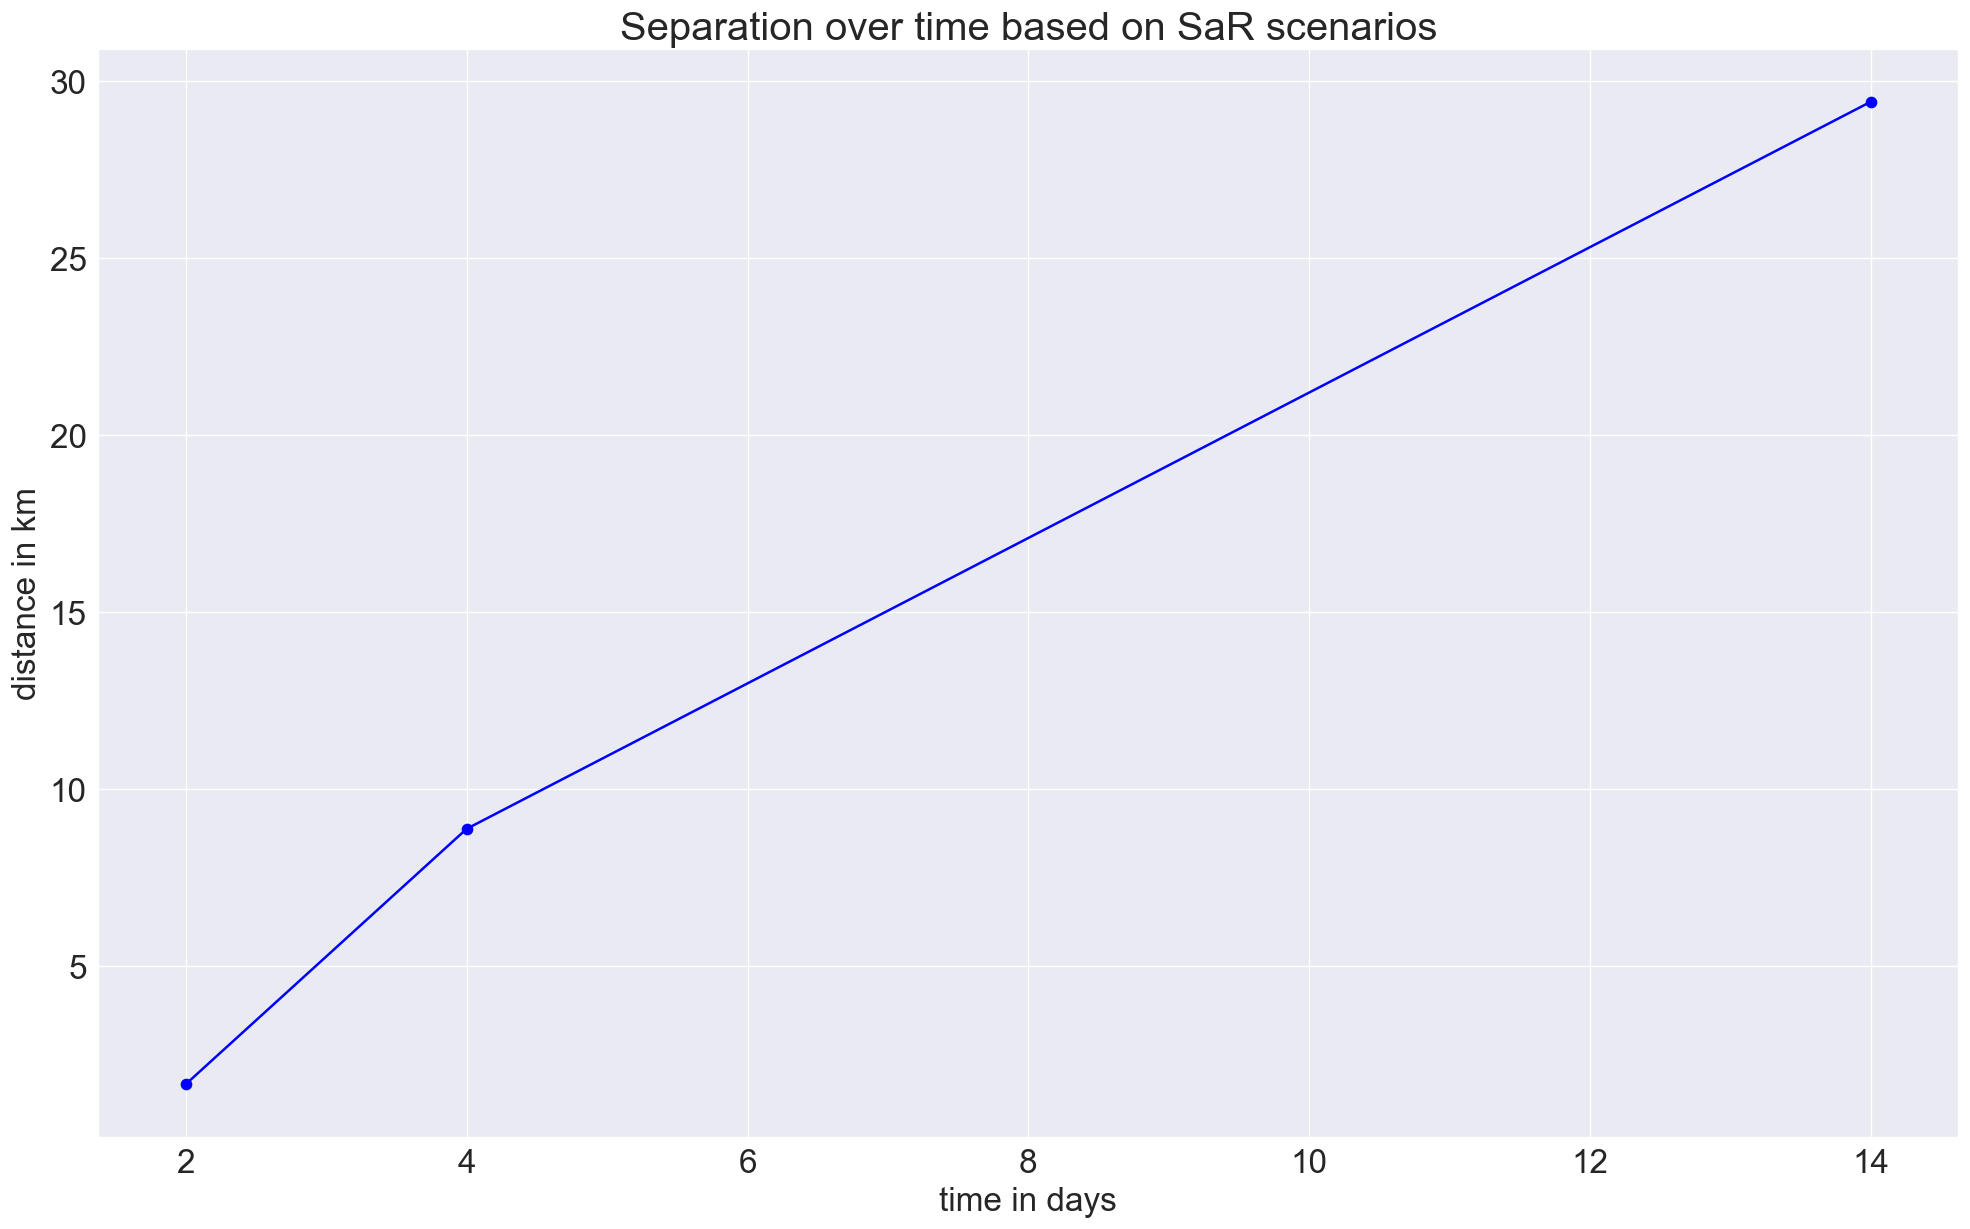

In [147]:
fig = plt.figure(figsize=(20, 12),dpi=120)
plt.rcParams.update({'font.size': 20})

plt.plot((2,4,14),(boat,caps,surf),c='blue')
plt.scatter(2, boat, c='blue')
plt.scatter(4, caps, c='blue')
plt.scatter(14,surf, c='blue')

plt.title("Separation over time based on SaR scenarios")
plt.ylabel("distance in km")
plt.xlabel("time in days")

In [102]:
blon = bc.lon
blat = bc.lat

blonmin = []
blonmax = []
blatmin = []
blatmax = []

boat = []

for i in range(len(blon[0,:])):
    blonmin= np.nanmin(blon[:,i])
    blonmax= np.nanmax(blon[:,i])
    blatmin= np.nanmin(blat[:,i])
    blatmax= np.nanmax(blat[:,i])
    bdd = (blonmin, blatmin)
    bd  = (blonmax, blatmax)
    boat.append(geopy.distance.vincenty((bdd), (bd)).km)
    
clon = cc.lon
clat = cc.lat

clonmin = []
clonmax = []
clatmin = []
clatmax = []

caps = []

for i in range(len(clon[0,:])):
    clonmin= np.nanmin(clon[:,i])
    clonmax= np.nanmax(clon[:,i])
    clatmin= np.nanmin(clat[:,i])
    clatmax= np.nanmax(clat[:,i])
    cdd = (clonmin, clatmin)
    cd  = (clonmax, clatmax)
    caps.append(geopy.distance.vincenty((cdd), (cd)).km)
    
slon = sc.lon
slat = sc.lat

slonmin = []
slonmax = []
slatmin = []
slatmax = []

surf = []

for i in range(len(slon[0,:])):
    slonmin= np.nanmin(slon[:,i])
    slonmax= np.nanmax(slon[:,i])
    slatmin= np.nanmin(slat[:,i])
    slatmax= np.nanmax(slat[:,i])
    sdd = (slonmin, slatmin)
    sd  = (slonmax, slatmax)
    surf.append(geopy.distance.vincenty((sdd), (sd)).km)

/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
/Users/hart-davis/miniconda3/envs/py3_parcels/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


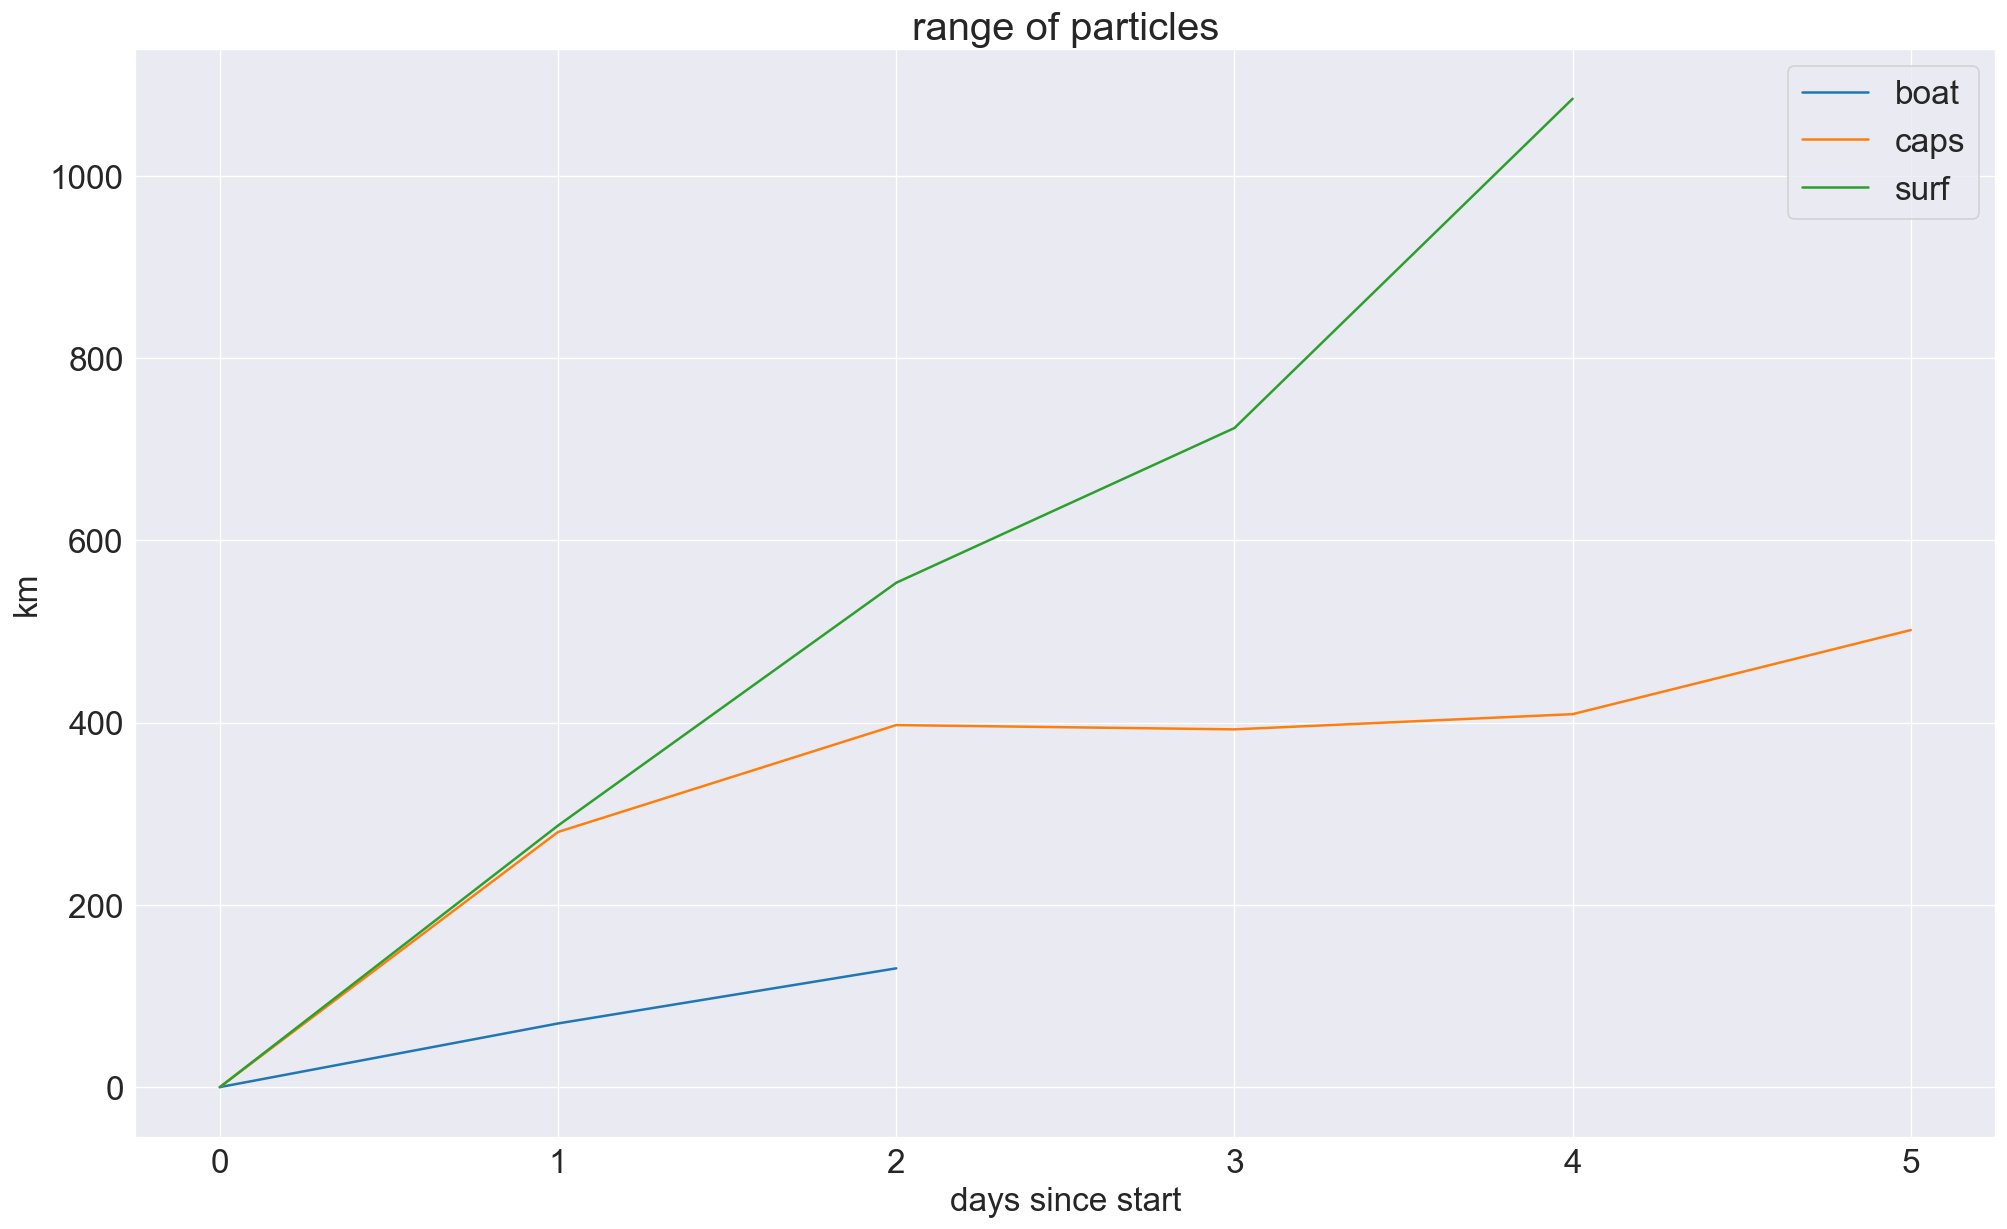

In [139]:
fig = plt.figure(figsize=(20, 12),dpi=120)
plt.rcParams.update({'font.size': 20})

plt.plot(boat[::24],label='boat')
plt.plot(caps[::24],label='caps')
plt.plot(surf[::5] ,label='surf')


plt.title("range of particles")
plt.ylabel("km")
plt.xlabel("days since start")
plt.legend()